# Скачайте датасет House Prices Kaggle  

(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pprint import pprint

df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv') # датасет House Prices Kaggle
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Выполните предварительную обработку данных, выполнив следующие шаги: 

## a. Определите и обработайте отсутствующие значения в датасете. 

Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
isnulls = df.isnull().sum() 
print(isnulls.iloc[isnulls.to_numpy().nonzero()[0]]) # печать только ненулевых сумм

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
# эти стобцы удаляем, так как много пропущенных значений:
df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

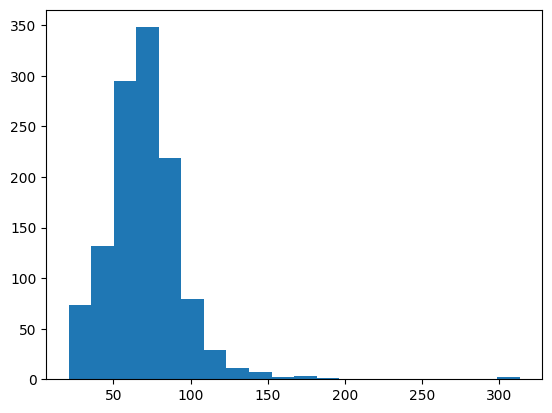

In [5]:
plt.hist(df['LotFrontage'], bins=20)
# так как распределение LotFrontage несимметричное, то отсутствующие значения заменяем медианными
LotFrontage_m = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(LotFrontage_m) 

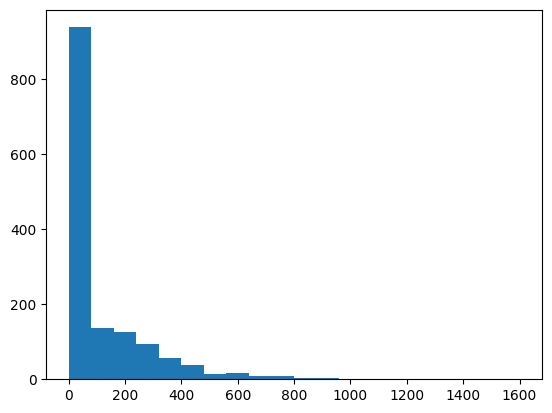

In [6]:
plt.hist(df['MasVnrArea'], bins=20)
# так как распределение MasVnrArea несимметричное, то отсутствующие значения заменяем медианными
MasVnrArea_m = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(MasVnrArea_m) 

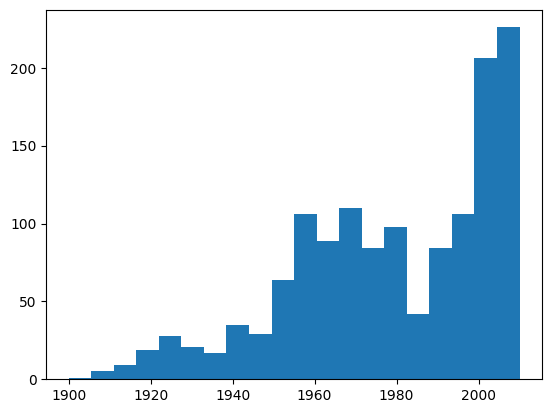

In [7]:
plt.hist(df['GarageYrBlt'], bins=20)
# так как распределение GarageYrBlt несимметричное, то отсутствующие значения заменяем медианными
GarageYrBlt_m = df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(GarageYrBlt_m) 

In [8]:
# для категориальных признаков, отсутствующие значения заменяем 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None') 
df['BsmtQual'] = df['BsmtQual'].fillna('None') 
df['BsmtCond'] = df['BsmtCond'].fillna('None') 
df['BsmtExposure'] = df['BsmtExposure'].fillna('None') 
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None') 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None') 
df['Electrical'] = df['Electrical'].fillna('None') 
df['GarageType'] = df['GarageType'].fillna('None') 
df['GarageFinish'] = df['GarageFinish'].fillna('None') 
df['GarageQual'] = df['GarageQual'].fillna('None') 
df['GarageCond'] = df['GarageCond'].fillna('None') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## b. Проверьте и обработайте любые дублирующиеся строки в датасете.

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 

## a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

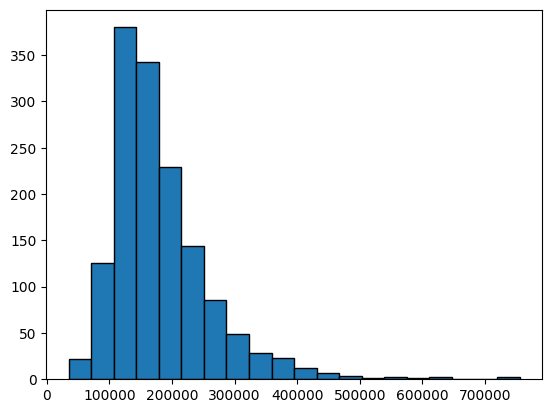

In [12]:
plt.hist(df['SalePrice'], bins=20, edgecolor='black')

Для оценки выбросов используем коробчатую диаграмму:

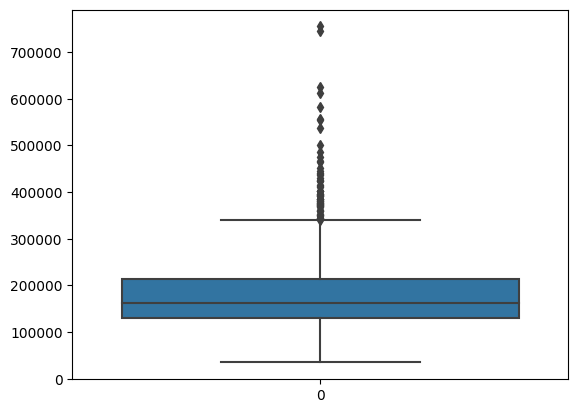

In [13]:
import seaborn as sns
sns.boxplot(df['SalePrice']); 

Выводы: 

- SalePrice имеет распределение, близкое к нецентральному $\chi^2$; 

- SalePrice имеет моду примерно 170 000 долларов, 25% и 75% перцентили 120 000 и 210 000 долларов соответственно;  
- есть выбросы при значении цены около 750000 долларов

## b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 

Для определения взаимосвязей построим корреляционную матрицу:

<AxesSubplot:>

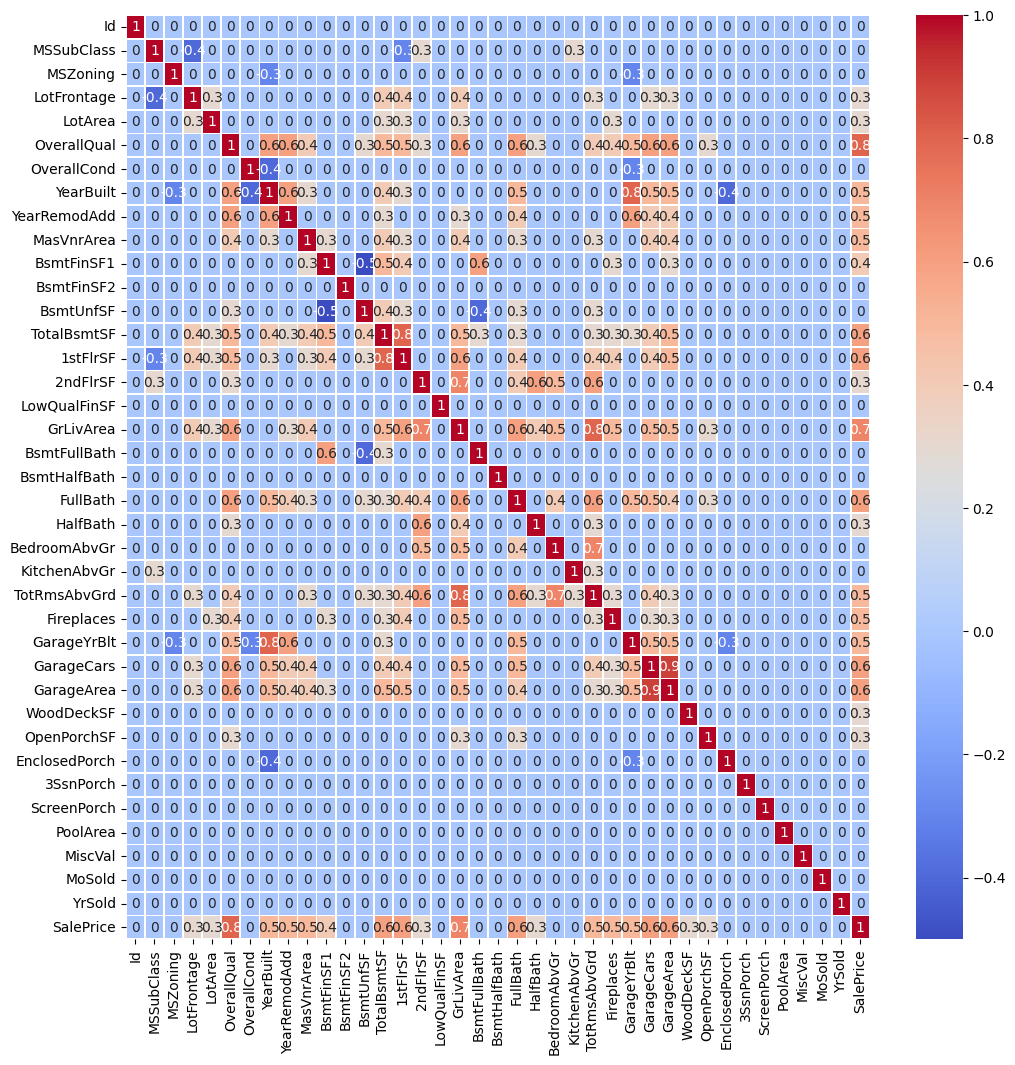

In [14]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1) 
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')

Вывод: целевая функция SalePrice (продажная цена) имеет сильную корреляцию (более 0.5) с параметрами OverallQual, TotalBsmtSF, 1stFlrSF,  GrLivArea, FullBath, GarageCars, GarageArea. Максимальная корреляция (0.8) - с параметром OverallQual (общее качество)

## c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

Для оценки распределения параметров построим их гистограммы и коробчатые диаграммы (см. ниже). Из графиков видно, что:

- все перечисленные параметры имеют несимметричные распределения;

- распределения OverallQual и GarageCars дискретны, что соответствует их физическому смыслу (качество в баллах и вместимость гаража);

- OverallQual имеет моду 6 баллов, 25% и 75% перцентили 5 и 7 баллов соответственно;

- GrLivArea имеет моду примерно 1500 кв.футов, 25% и 75% перцентили 1200 и 1800 кв.футов соответственно и заметные выбросы в диапазоне от 3000 до 6000 кв.футов;

- OverallQual имеет 25% и 75% перцентили 1 и 2 машины соответственно, абсолютный максимум (выброс) - 4 машины;

Взаимосвязи параметров определяются по корреляционной матрице, построенной выше.

OverallQual имеет сильную корреляцию (более 0.5) с параметрами YearBuilt, YearRemodAdd, GrLivArea, FullBath, GarageCars, GarageArea, SalePrice. Максимальная корреляция (0.8) - с параметром SalePrice (продажная цена)

GrLivArea (общая жилая площадь) имеет сильную корреляцию (более 0.5) с параметрами OverallQual, 1stFlrSF, 2stFlrSF, FullBath, TotRmsAbvGrd, SalePrice. Максимальная корреляция (0.8) - с параметром TotRmsAbvGrd (число комнат выше уровня земли)

GarageCars (вместимость гаража) имеет сильную корреляцию (более 0.5) с параметрами OverallQual, SalePrice, GarageArea. Максимальная корреляция (0.9) - с параметром GarageArea (площадь гаража)


## d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

(array([  2.,   0.,   3.,   0.,  20.,   0., 116.,   0., 397.,   0.,   0.,
        374.,   0., 319.,   0., 168.,   0.,  43.,   0.,  18.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

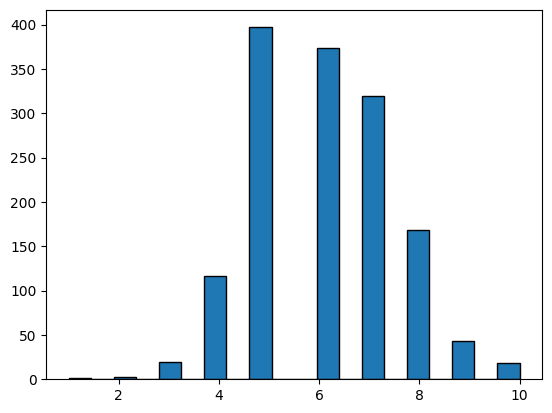

In [15]:
plt.hist(df['OverallQual'], bins=20, edgecolor='black')

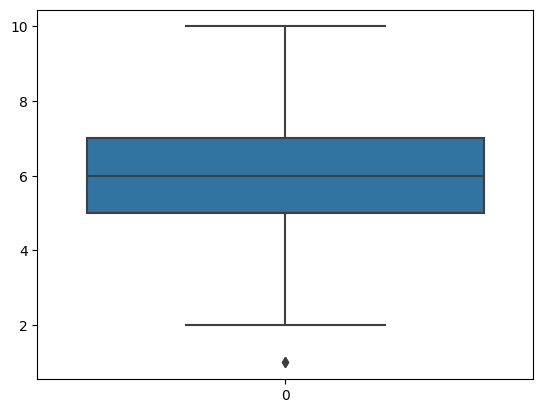

In [16]:
sns.boxplot(df['OverallQual']);

(array([  4., 103., 259., 295., 304., 231., 124.,  65.,  41.,  16.,   8.,
          4.,   2.,   0.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([ 334. ,  599.4,  864.8, 1130.2, 1395.6, 1661. , 1926.4, 2191.8,
        2457.2, 2722.6, 2988. , 3253.4, 3518.8, 3784.2, 4049.6, 4315. ,
        4580.4, 4845.8, 5111.2, 5376.6, 5642. ]),
 <BarContainer object of 20 artists>)

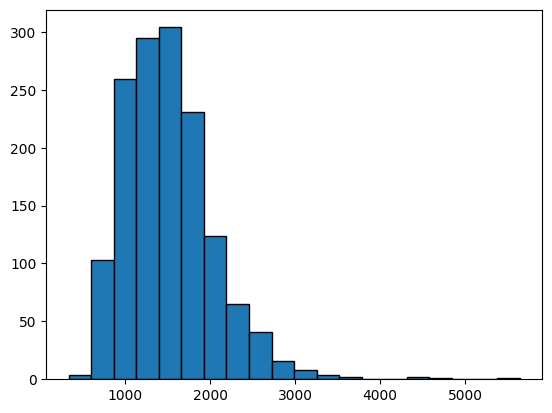

In [17]:
plt.hist(df['GrLivArea'], bins=20, edgecolor='black')

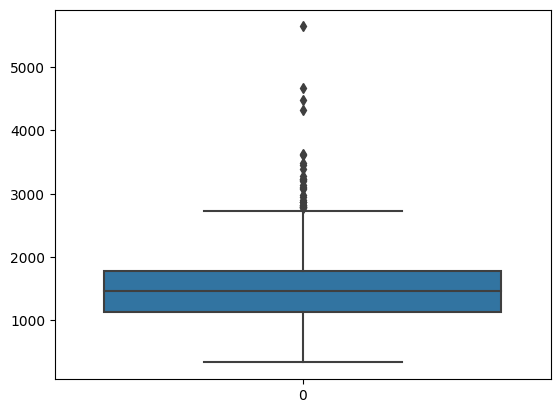

In [18]:
sns.boxplot(df['GrLivArea']);

(array([ 81.,   0.,   0.,   0.,   0., 369.,   0.,   0.,   0.,   0., 824.,
          0.,   0.,   0.,   0., 181.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

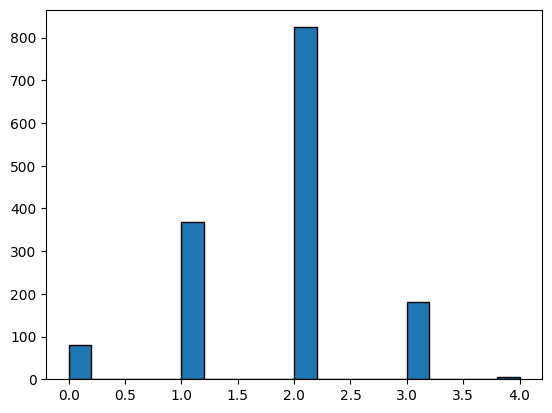

In [19]:
plt.hist(df['GarageCars'], bins=20, edgecolor='black')

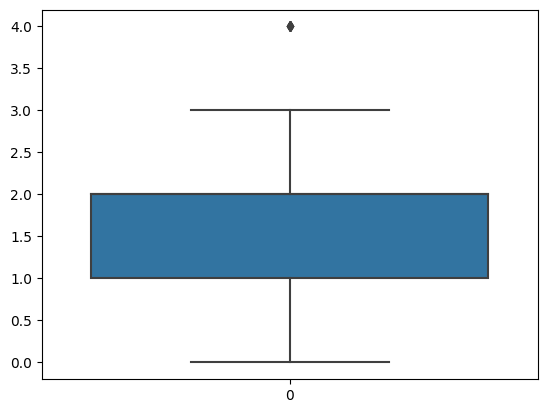

In [20]:
sns.boxplot(df['GarageCars']);

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Выполните проектирование признаков путем реализации следующих преобразований: 

## a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 

one-hot encoding:

In [22]:
df = pd.get_dummies(df, columns=['Utilities'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   int64  
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


label encoding:

In [23]:
df['LandContour_Pts'] = le.fit_transform(df['LandContour'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   int64  
 2   MSZoning          1460 non-null   int64  
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   int64  
 16  OverallCond       1460 non-null   int64  


In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Utilities_AllPub,Utilities_NoSeWa,LandContour_Pts
0,1,60,3,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,1,0,3
1,2,20,3,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1,0,3
2,3,60,3,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,1,0,3
3,4,70,3,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1,0,3
4,5,60,3,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,1,0,3


## b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [25]:
# общая площадь
df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea'] + df['GarageArea'] 
df['TotalArea'].head()

0    3114
1    2984
2    3314
3    3115
4    4179
Name: TotalArea, dtype: int64

In [26]:
# возраст объекта недвижимости
import datetime

currentDateTime = datetime.datetime.now()
df['Age'] = - df['YearBuilt'] + currentDateTime.year
df['Age'].head()

0     20
1     47
2     22
3    108
4     23
Name: Age, dtype: int64

# Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [27]:
df.to_csv('cleaned_house_prices.csv', index=False)